# Linear regression using the Normal Equation

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)

In [4]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

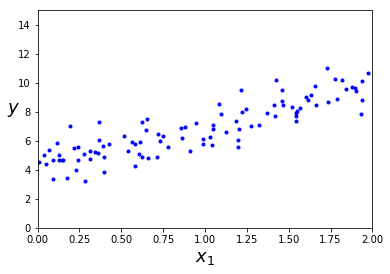

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
x = plt.axis([0, 2, 0, 15])

**normal equation:**
$$ \hat{a} = (X^T X)X^T y$$

In [6]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

 | |original | calculated |
 |-|-|-|
 |intercept| 4| 3.865|
 |weight|3| 3.14|

#### Prediction using theta_best

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

#### plot between predictions and original data

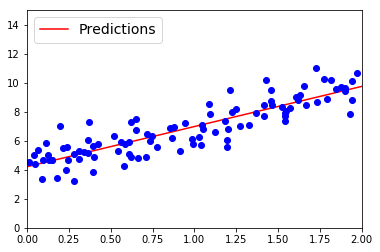

In [9]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "bo")
plt.legend(loc="upper left", fontsize=14)
x = plt.axis([0, 2, 0, 15])

#### LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

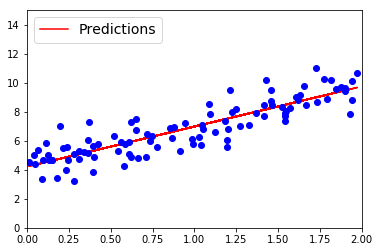

In [12]:
plt.plot(X,lin_reg.predict(X) , "r-", label="Predictions")
plt.plot(X, y, "bo")
plt.legend(loc="upper left", fontsize=14)
x = plt.axis([0, 2, 0, 15])

# Linear regression using batch gradient descent

* Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.
* To implement Gradient Descent, you need to compute the gradient of the cost function
with regards to each model parameter $θ_j$.

# Stochastic Gradient Descent

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

# Polynomial regression

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

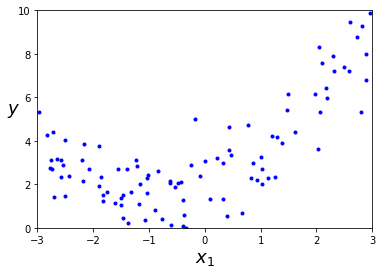

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
x = plt.axis([-3, 3, 0, 10])

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.89952955])

In [18]:
X_poly[0]

array([-0.89952955,  0.80915342])

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99117503]), array([[0.88410393, 0.49914543]]))

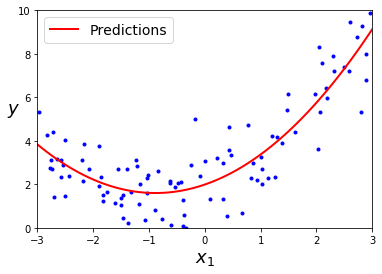

In [20]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
x=plt.axis([-3, 3, 0, 10])

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# Regularized Linear Models

|degree| over fitting| variance| training data|
|-|-|-|-|
|higher|more|high|high sensitive|
|lower|less|low| less sensitive|

## Methods to reduce overfitting
* reduce the number ploynomial degrees.
* constraining the weights of the model.
* early stopping.

### Reducing the number plynomial degrees

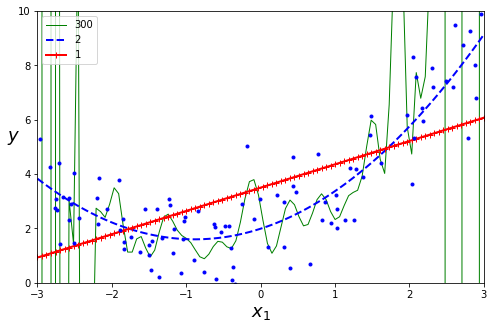

In [22]:
plt.figure(figsize=(8, 5))
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
x = plt.axis([-3, 3, 0, 10])

### constraining the weights of the model
* Ridge regression.
* lasso regression.
* Elastic Net

#### Ridge regression

$$J(\theta) = MSE(\theta) + \alpha* \frac{1}{2} \sum_{i=1}^{n} (\theta_i)^2 $$
where<br>
$MSE(\theta)$  = cost function<br>
$\alpha* \frac{1}{2} \sum_{i=1}^{n} (\theta_i)^2$ = regularization term<br>
$\alpha$ = hyperparameter

$\alpha = 0$ : Ridge regression =linear regression.<br>
$\alpha = very large$: weights end up very close to zero and the result is a flat line going through the data means.

*Note:*
* Bias term $\theta_0$ is not regularized
* It is important to scale of the input features. This is true of most regularized models.

**steps to follow for Ridge Rgression**<br>
* *ploynomial Regression with Ridge Regularization*<br>
1) The data is first expanded using ploynomial features.<br>
2) Standard Scaler.<br>
3) Ridge model is applied to the resulting features.<br>

In [23]:
from sklearn.linear_model import Ridge

In [24]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [25]:
def my_regularized_model(model_class, alpha, style, ploynomial, **model_kargs):
    for alpha, style in zip(alpha, style):
        model = model_class(alpha=alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if ploynomial:
            model = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), 
                                          StandardScaler(), model)
        model.fit(X,y)
        y_new = model.predict(X_new)
        plt.plot(X_new, y_new, style, label=r"$\alpha = {}$".format(alpha))

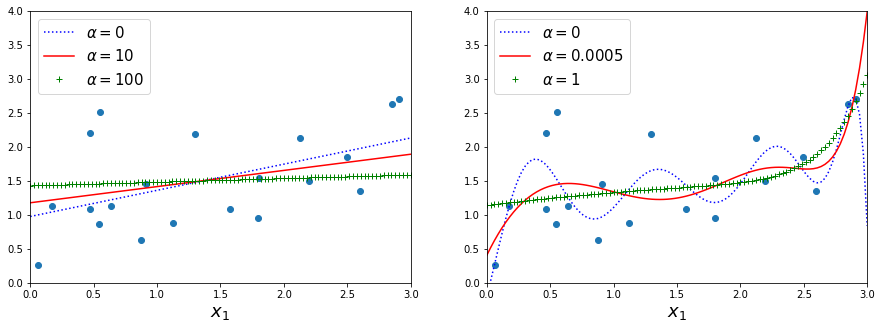

In [26]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X, y)
my_regularized_model(Ridge, [0, 10, 100], ['b:', 'r-', 'g+'], False)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
x = plt.axis([0, 3, 0, 4])

plt.subplot(122)
plt.scatter(X, y)
my_regularized_model(Ridge, [0, 0.0005, 1], ['b:', 'r-', 'g+'], True)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
x = plt.axis([0, 3, 0, 4])

In [27]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

* *Ridge regression with Stochastic Gradient*<br>
1) set penalty hyperparameter to **'l2'** which mean add regularization term to the cost function equal to half the square of the $l_2 norm$

In [28]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=5, penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.12795912])

#### Lasso Regression
$$J(\theta) = MSE(\theta) + \alpha* \sum_{i=1}^{n} |\theta_i| $$
$MSE(\theta)$  = cost function<br>
$\alpha* \sum_{i=1}^{n} |\theta_i|$ = regularization term<br>
$\alpha$ = hyperparameter

**Note**:<br>
1) To completely eliminate the wight of the least important features.

**steps to follow for Lasso Rgression**<br>
* *ploynomial Regression with Lasso Regularization*<br>
1) The data is first expanded using ploynomial features.<br>
2) Standard Scaler.<br>
3) Lasso model is applied to the resulting features.<br>

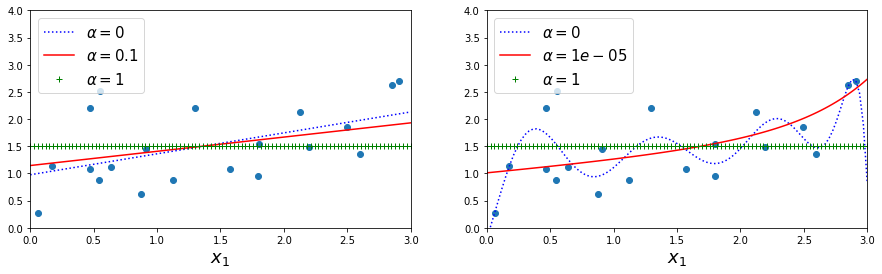

In [29]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.scatter(X, y)
my_regularized_model(Lasso, [0, 0.1, 1], ['b:', 'r-', 'g+'], False, random_state=42)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
x = plt.axis([0, 3, 0, 4])

plt.subplot(122)
plt.scatter(X, y)
my_regularized_model(Lasso, [0, 0.00001, 1], ['b:', 'r-', 'g+'], True, tol = 1, random_state=42)
plt.legend(loc="upper left", fontsize=15)
plt.xlabel("$x_1$", fontsize=18)
x = plt.axis([0, 3, 0, 4])

In [30]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#### Elastic Net
1) This Regularization term is a simple mix of both Ridge.
$$J(\theta) = MSE(\theta) + r*\alpha* \sum_{i=1}^{n} |\theta_i| + \frac{(1-r)}{2}*\alpha* \sum_{i=1}^{n} (\theta_i)^2 $$
where<br>
if $r = 0$ Elastic net = Ridge Regression.<br>
if $r = 1$ Elastic Net = Lasso Regression.<br>
* **scikit-learn's** ElasticNet has hyperparameter L1_ratio correspondings to the mix ratio r.

In [31]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early stopping
* A very different way to regularize iterative learning algoritms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping

**steps to follow for Early stopping Rgression**<br>
* *ploynomial Regression with Early stopping Regularization*<br>
1) The data is first expanded using ploynomial features.<br>
2) Standard Scaler.<br>
3) SGDRegresso model is applied to the resulting features.<br>
**Note**: warm_start = True, when fit() method is called, it just continues training where it left off instead of restarting from scratch

### when should you use linear Regression , Ridge, Lasso and elastic net?

1) It is almost always preferable to have atleast a little bit of regularization.<br>
2) Ridge is a good default.<br>
3) If you suspect that only a few features are actually useful, use Lasso or Elastic Net.<br>
4) In general Elastic net is prefered over Lasso.<br>
5) Lasso may behave erratically when the number of features is greater than the number of training instance.<br>

#### learning curves

In [32]:
from sklearn.metrics import mean_squared_error
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)
poly_scaler = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

In [33]:
X_train_poly = poly_scaler.fit_transform(X_train)
X_val_poly = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

Text(0,0.5,'RMSE')

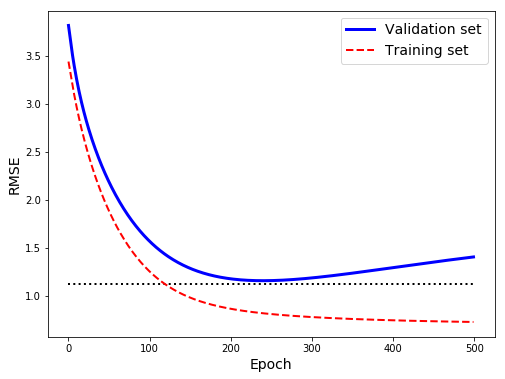

In [34]:
n_epochs = 500
plt.figure(figsize=(8,6))
train_err, val_err = [], [] 
for epochs in range(n_epochs):
    sgd_reg.fit(X_train_poly, y_train)
    y_train_pred = sgd_reg.predict(X_train_poly)
    y_val_pred = sgd_reg.predict(X_val_poly)
    train_err.append(mean_squared_error(y_train_pred, y_train))
    val_err.append(mean_squared_error(y_val_pred, y_val))
best_epoch = np.argmin(val_err)
best_val_rmse = np.sqrt(val_err[best_epoch])    

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_err), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_err), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

#### getting best model

In [35]:
from sklearn.base import clone

In [36]:
min_val_err = float('inf')
best_epoch = None
best_model = None
n_epochs = 500
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

for epochs in range(n_epochs):
    sgd_reg.fit(X_train_poly, y_train)
    y_train_pred = sgd_reg.predict(X_train_poly)
    y_val_pred = sgd_reg.predict(X_val_poly)
    val_err = mean_squared_error(y_val_pred, y_val)
    if min_val_err > val_err :
        min_val_err = val_err
        best_model = clone(sgd_reg)
        best_epoch = epochs

In [37]:
best_epoch, best_model

(239, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))